In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt


# Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

df = pd.read_csv("Churn_Modelling.csv")

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#What we have to do: 1) Build a deep learning model to predict churn rate at bank. 2) Once model is built, print classification report and analyze precision, recall and f1-score


#Start with Data Cleaning:
#Drop rows that server no purpose - RowNumber, CustimerId, Surname


df.drop('RowNumber',axis='columns',inplace=True)
df.drop('CustomerId',axis='columns',inplace=True)
df.drop('Surname',axis='columns',inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data Visualisation

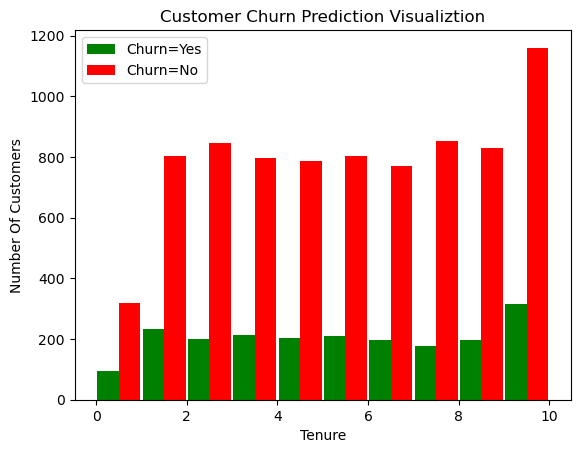

In [9]:
#Churn based on Tenure


tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

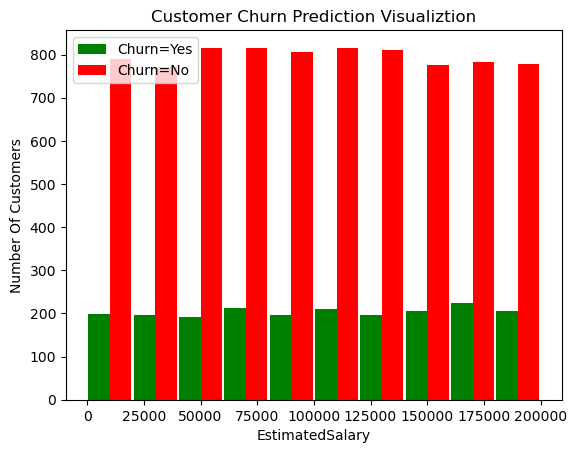

In [12]:
tenure_churn_no = df[df.Exited==0].EstimatedSalary
tenure_churn_yes = df[df.Exited==1].EstimatedSalary

plt.xlabel("EstimatedSalary")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend();

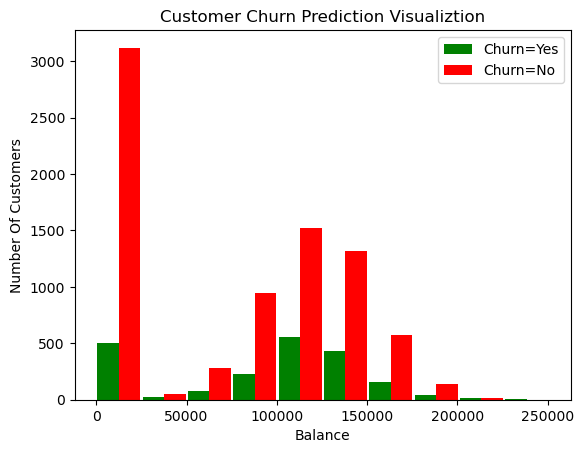

In [13]:
tenure_churn_no = df[df.Exited==0].Balance
tenure_churn_yes = df[df.Exited==1].Balance

plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend();

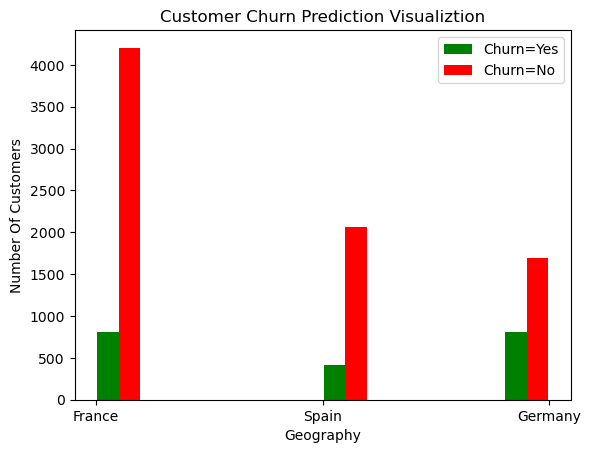

In [14]:
tenure_churn_no = df[df.Exited==0].Geography
tenure_churn_yes = df[df.Exited==1].Geography
plt.xlabel("Geography")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend();

In [15]:
#Check the data types we are dealing with


df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
# We see Geography and Gender is categorical. These need to be sorted


#print_unique_col_values(df)
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

print_unique_col_values(df)
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [19]:
#There are two ways to sort this. We can do mapping or simply use on-hot-encoding


df['Gender'].replace({'Female':1,'Male':0},inplace=True)

df['Geography'].replace({'France':0, 'Spain':1, 'Germany':2},inplace=True)

In [20]:
#What does the DataFrame now looks like?


df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [21]:
#Checkng datatypes now


df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Train-test-split

In [22]:


cols_to_scale = ['Tenure','Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

X = df.drop('Exited',axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

Build a model in TensorFlow

In [26]:


import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 0.9014 - accuracy: 0.7846
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.7958
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4723 - accuracy: 0.7977
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.7991
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.7977
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.8004
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.8018
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4565 - accuracy: 0.8021
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.8043
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.8041

In [27]:
yp = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [28]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [30]:
#Classification Report

from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1595
           1       0.44      0.55      0.49       405

    accuracy                           0.77      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.79      0.77      0.78      2000



Text(95.72222222222221, 0.5, 'Truth')

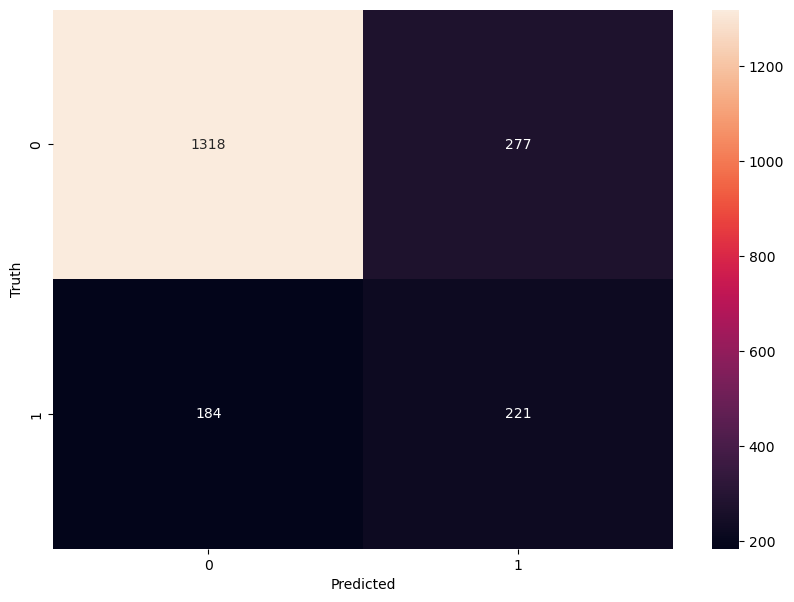

In [31]:
#Plot confusion matrix

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')